In [2]:
import pandas as pd

In [4]:
#lendo arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [5]:
#mesclando dataframes
df = pd.concat([df1, df2, df3, df4, df5])

In [6]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [7]:
#ultimas 5 linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [9]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
98,Recife,2019-01-01,137.34,981,8
233,Salvador,2019-01-03,172.40,1036,2
43,Fortaleza,2019-01-01,191.52,1004,1
82,Recife,2019-01-01,29.55,981,6
160,Natal,2019-01-02,11.76,1034,1


In [11]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [12]:
df["LojaID"] = df["LojaID"].astype("object")

In [14]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [16]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [17]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [18]:
#substituindo valores null pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [19]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [20]:
#substitui valores null por zero
df["Vendas"].fillna(0, inplace=True)

In [23]:
#apagando linhas com null
df.dropna(how="all", inplace=True)

In [26]:
df.dropna(subset=["Vendas"], inplace=True)

In [27]:
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [28]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [29]:
df["Receita"].max()

3544.0

In [30]:
df["Receita"].min()

3.34

In [31]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [32]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [33]:
#nlargset
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [34]:
#nsmallest
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [35]:
#agrupando por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [37]:
#ordenando o dataset
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


In [38]:
#transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [39]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [40]:
df["Data"] = pd.to_datetime(df["Data"])

In [41]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [42]:
#agrupando por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [44]:
#criando coluna ano_venda
df["Ano_Venda"] = df["Data"].dt.year

In [45]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano,Ano_Venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0,2018,2018
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0,2018,2018
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0,2018,2018
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0,2018,2018
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0,2018,2018


In [48]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano,Ano_Venda
83,Fortaleza,2019-01-01,3.88,1002,6,23.28,6.0,2019,2019
132,Fortaleza,2019-03-02,17.49,983,5,87.45,5.0,2019,2019
78,Recife,2019-01-01,238.73,980,3,716.19,3.0,2019,2019
90,Aracaju,2018-01-01,16.27,1522,1,16.27,1.0,2018,2018
40,Fortaleza,2019-02-13,19.13,1002,4,76.52,4.0,2019,2019


In [49]:
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [50]:
#extraindo o mês e o fia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month,  df["Data"].dt.day)

In [51]:
df.sample()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano,Ano_Venda,mes_venda,dia_venda
146,Salvador,2019-01-02,149.88,1037,1,149.88,1.0,2019,2019,1,2


In [52]:
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [53]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano,Ano_Venda,mes_venda,dia_venda,diferenca_dias
176,Salvador,2019-01-02,19.42,1035,3,58.26,3.0,2019,2019,1,2,366 days
99,Natal,2019-01-02,40.38,1037,1,40.38,1.0,2019,2019,1,2,366 days
75,Natal,2019-03-30,706.00,854,2,1412.00,2.0,2019,2019,3,30,453 days
109,Aracaju,2018-01-01,51.64,1523,5,258.20,5.0,2018,2018,1,1,0 days
0,Natal,2018-08-27,606.00,853,2,1212.00,2.0,2018,2018,8,27,238 days


In [54]:
df["trimestre_venda"] = df["Data"].dt.quarter

In [55]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
96,Fortaleza,2019-01-01,23.31,1004,4,93.24,4.0,2019,2019,1,1,365 days,1
83,Salvador,2019-01-01,63.66,1036,2,127.32,2.0,2019,2019,1,1,365 days,1
3,Natal,2019-01-07,271.00,854,3,813.00,3.0,2019,2019,1,7,371 days,1
48,Recife,2019-01-01,141.19,980,7,988.33,7.0,2019,2019,1,1,365 days,1
98,Natal,2019-01-02,231.76,1036,3,695.28,3.0,2019,2019,1,2,366 days,1


In [56]:
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [57]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,2019,3,2,425 days,1


In [58]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

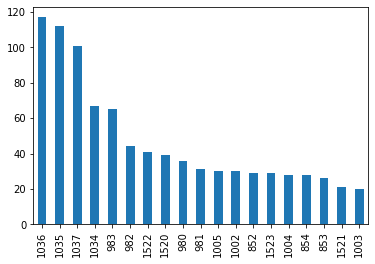

In [59]:
df["LojaID"].value_counts(ascending=False).plot.bar()

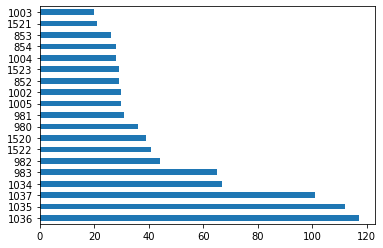

In [60]:
df["LojaID"].value_counts().plot.barh()  

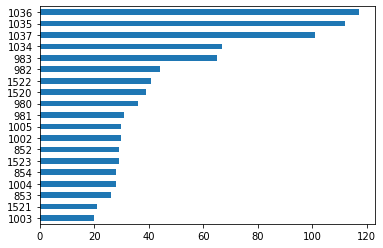

In [61]:
df["LojaID"].value_counts(ascending=True).plot.barh()

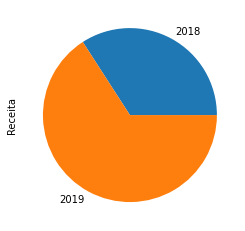

In [63]:
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [64]:
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total de vendas')

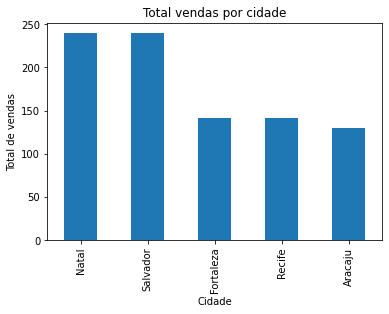

In [65]:
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas")

Text(0, 0.5, 'Total de vendas')

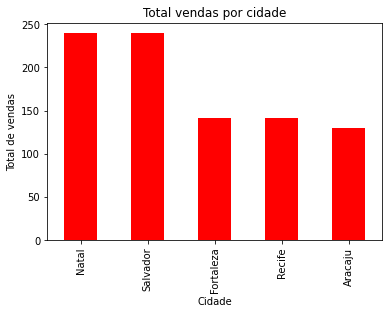

In [66]:
df["Cidade"].value_counts().plot.bar(title="Total vendas por cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas")

In [67]:
plt.style.use("ggplot")

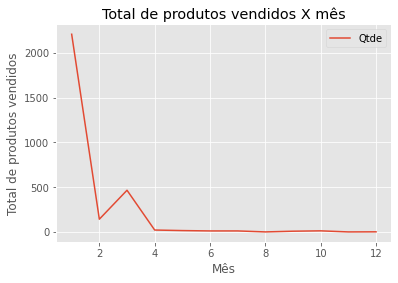

In [71]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title="Total de produtos vendidos X mês")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend()

In [72]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [74]:
df_2019 = df[df["Ano_Venda"] == 2019]

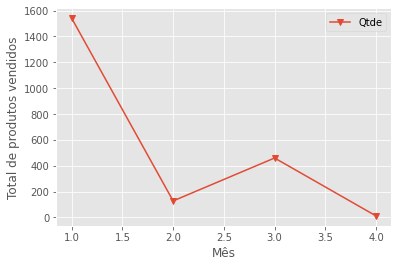

In [75]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend()

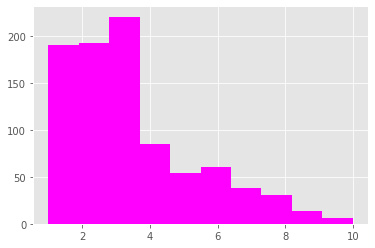

In [77]:
#histograma
plt.hist(df["Qtde"], color="magenta");

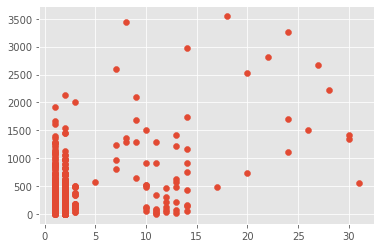

In [78]:
plt.scatter(x=df_2019["dia_venda"], y=df_2019["Receita"]);